In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataFrame=pd.read_csv('bp.csv')
dataFrame.head()

,Sex,Alcohot Consumption(per day),Smoke Status(per day),Exercise level,Stress Level,BMI,Salt intake Level,Age,Outcome
0,0,2,6,35,31,33.6,2029,50,1
1,1,4,7,29,25,26.6,1884,31,0
2,1,4,11,0,17,23.3,1872,32,1
3,0,4,10,23,44,28.1,1611,21,0
4,0,1,10,35,22,43.1,1794,33,1


In [4]:
dataFrame.shape

(768, 9)

In [5]:
dataFrame=dataFrame.drop_duplicates()

In [6]:
dataFrame.shape

(768, 9)

In [7]:
print('No. of zero values in Alcohot Consumption(per day)',dataFrame[dataFrame[ 'Alcohot Consumption(per day)']==0].shape[0] )
print('No. of zero values in Smoke Status(per day)',dataFrame[dataFrame[ 'Smoke Status(per day)']==0].shape[0] )
print('No. of zero values in Stress Level',dataFrame[dataFrame[ 'Stress Level']==0].shape[0] )
print('No. of zero values in BMI',dataFrame[dataFrame[ 'BMI']==0].shape[0] )


No. of zero values in Alcohot Consumption(per day) 0
No. of zero values in Smoke Status(per day) 0
No. of zero values in Stress Level 0
No. of zero values in BMI 11


In [8]:
#Replace no.of zero valles with mean of that columns

dataFrame['Alcohot Consumption(per day)']=dataFrame[ 'Alcohot Consumption(per day)'].replace(0, dataFrame[ 'Alcohot Consumption(per day)'].mean())
dataFrame['Smoke Status(per day)']=dataFrame[ 'Smoke Status(per day)'].replace(0,dataFrame['Smoke Status(per day)'].mean()) 
dataFrame[ 'Stress Level']=dataFrame[ 'Stress Level'].replace(0,dataFrame['Stress Level'].mean()) 
dataFrame['Salt intake Level']=dataFrame['Salt intake Level'].replace(0,dataFrame['Salt intake Level'].mean()) 
dataFrame[ 'BMI' ]=dataFrame['BMI' ].replace(0, dataFrame[ 'BMI' ].mean())

In [9]:
print('No. of zero values in Alcohot Consumption(per day)',dataFrame[dataFrame[ 'Alcohot Consumption(per day)']==0].shape[0] )
print('No. of zero values in Smoke Status(per day)',dataFrame[dataFrame[ 'Smoke Status(per day)']==0].shape[0] )
print('No. of zero values in Stress Level',dataFrame[dataFrame[ 'Stress Level']==0].shape[0] )
print('No. of zero values in BMI',dataFrame[dataFrame[ 'BMI']==0].shape[0] )

No. of zero values in Alcohot Consumption(per day) 0
No. of zero values in Smoke Status(per day) 0
No. of zero values in Stress Level 0
No. of zero values in BMI 0


In [10]:
dataFrame.describe()

,Sex,Alcohot Consumption(per day),Smoke Status(per day),Exercise level,Stress Level,BMI,Salt intake Level,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.507812,4.782552,8.427083,20.536458,29.226562,32.450805,1895.738281,33.240885,0.348958
std,0.500265,2.568662,1.708143,15.952218,11.218964,6.875374,235.370839,11.760232,0.476951
min,0.000000,1.000000,6.000000,0.000000,10.000000,18.200000,1500.000000,21.000000,0.000000
25%,0.000000,3.000000,7.000000,0.000000,19.000000,27.500000,1686.000000,24.000000,0.000000
50%,1.000000,5.000000,8.000000,23.000000,30.000000,32.000000,1885.000000,29.000000,0.000000
75%,1.000000,7.000000,10.000000,32.000000,39.000000,36.600000,2106.500000,41.000000,1.000000
max,1.000000,9.000000,11.000000,99.000000,48.000000,67.100000,2300.000000,81.000000,1.000000


In [11]:
#infromation of dataset
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           768 non-null    int64  
 1   Alcohot Consumption(per day)  768 non-null    int64  
 2   Smoke Status(per day)         768 non-null    int64  
 3   Exercise level                768 non-null    int64  
 4   Stress Level                  768 non-null    int64  
 5   BMI                           768 non-null    float64
 6   Salt intake Level             768 non-null    int64  
 7   Age                           768 non-null    int64  
 8   Outcome                       768 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 60.0 KB


In [12]:
#any null values 
#not neccessary in above information we can see
dataFrame.isnull().values.any()

False

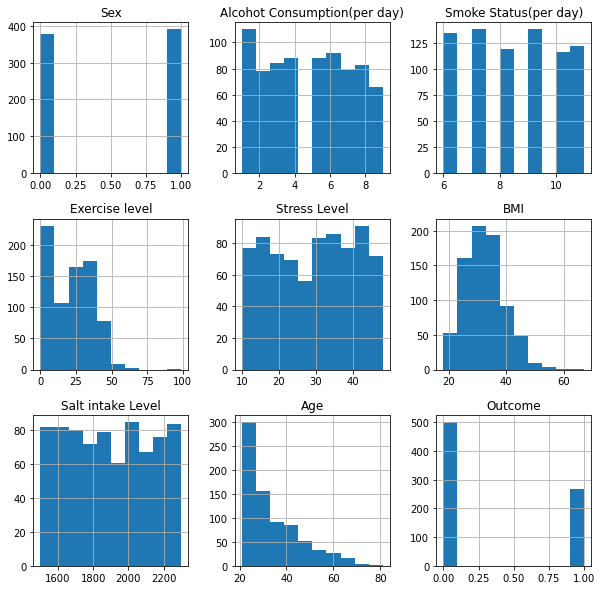

In [13]:
#histogram
dataFrame.hist(bins=10,figsize=(10,10))
plt.show()

<AxesSubplot:>

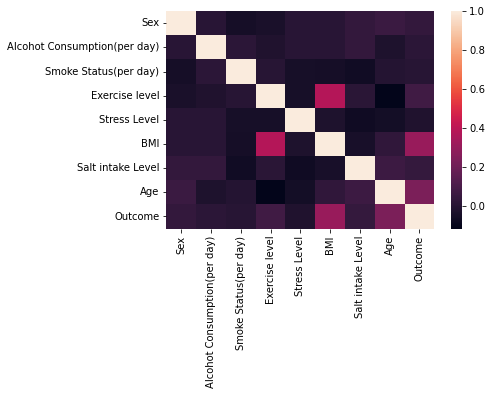

In [14]:
#correlation

sns.heatmap(dataFrame.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

<AxesSubplot:xlabel='count', ylabel='Outcome'>

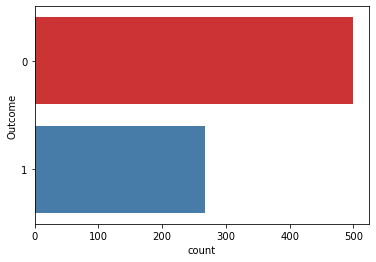

In [15]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=dataFrame['Outcome'],palette='Set1')

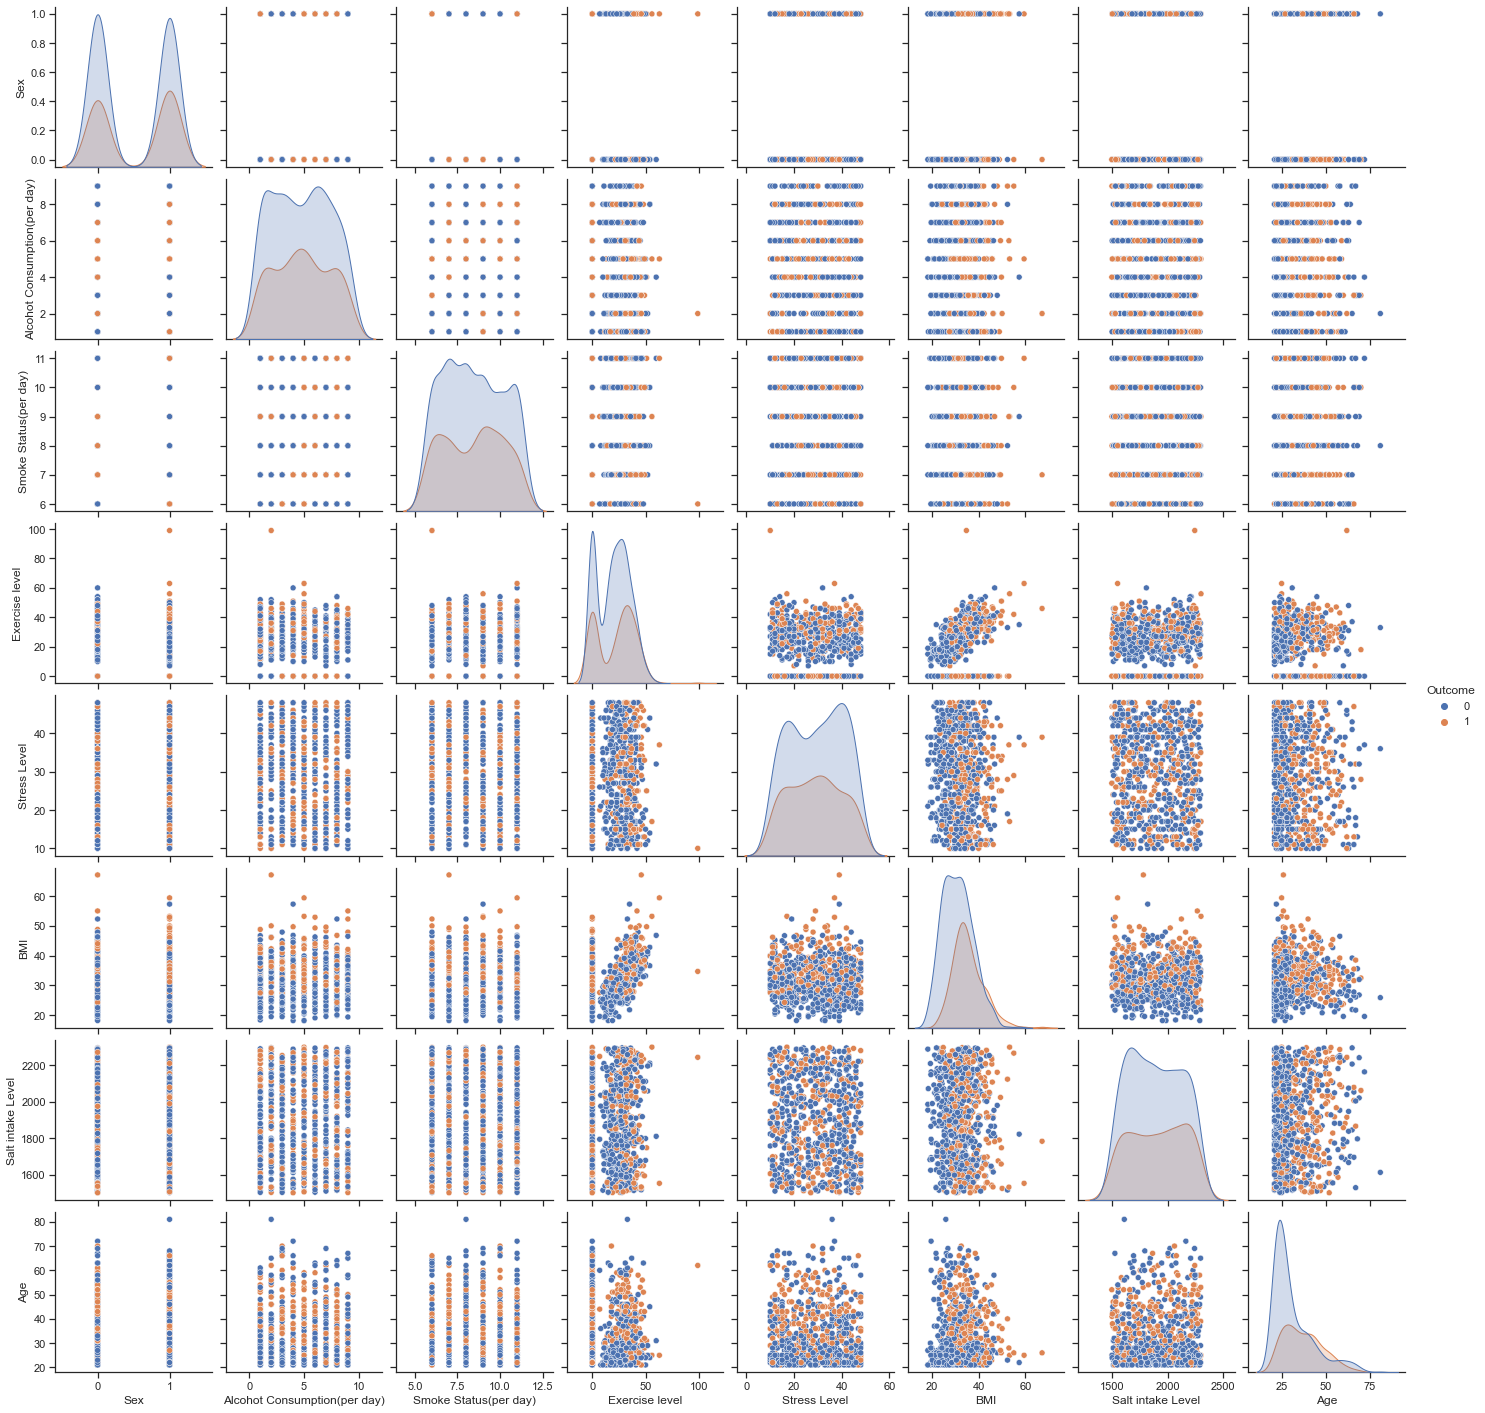

In [16]:
sns.set(style="ticks")
sns.pairplot(dataFrame, hue="Outcome")

In [17]:
#lets extract features and targets
X = dataFrame.drop(columns = 'Outcome', axis=1)
Y = dataFrame['Outcome']

In [18]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.2 ,stratify=Y, random_state=2)

In [19]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((614, 8), (154, 8), (614,), (154,))

In [20]:
#initilaizing the arrays of accuracy and roc curve
accuracyArray=[]
rocArray=[]

In [21]:
#Lets build the model

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import joblib 

classifier=LogisticRegression()
classifier.fit(train_X,train_y)
y_prediction=classifier.predict(test_X)
#find accuracy
accuracy=accuracy_score(test_y,y_prediction)
accuracyArray.append(accuracy)

#find the ROC_AOC curve
rcurve=roc_auc_score(test_y,y_prediction)
rocArray.append(rcurve)
print("\nAccuracy {0} ROC {1}".format(accuracy,rcurve))

#adding input

inputD = (0,84,82,31,125,38.2,0.233,23)

# changing the inputD to numpy array
inputDasNumArray = np.asarray(inputD)

# reshape the array as we are predicting for one instance
standardData = inputDasNumArray.reshape(1,-1)

prediction = classifier.predict(standardData)
#print(prediction)

if (prediction[0] == 0):
  print('The person is not suffering from bloodpressure')
else:
  print('The person is suffering from bloodpressure')

joblib.dump(classifier, 'Logistic Regression.pkl')



Accuracy 0.6168831168831169 ROC 0.5303703703703704
The person is not suffering from bloodpressure


['Logistic Regression.pkl']

In [22]:
#Support Vector Machine linear
from sklearn.svm import SVC

classifier=SVC(kernel='linear')
classifier.fit(train_X,train_y)
y_prediction=classifier.predict(test_X)   # test_X 20 percent data other than out come   y_prediction : saving the value from 20 percent that percent is diabetic or not

#find accuracy
accuracy=accuracy_score(test_y,y_prediction)
accuracyArray.append(accuracy)

#find the ROC_AOC curve
rcurve=roc_auc_score(test_y,y_prediction)
rocArray.append(rcurve)
print("\nAccuracy {0} ROC {1}".format(accuracy,rcurve))

#adding input

inputD = (0,84,82,31,125,38.2,0.233,23)

# changing the inputD to numpy array
inputDasNumArray = np.asarray(inputD)

# reshape the array as we are predicting for one instance
standardData = inputDasNumArray.reshape(1,-1)

prediction = classifier.predict(standardData)
#print(prediction)

if (prediction[0] == 0):
  print('The person is not suffering from bloodpressure')
else:
  print('The person is suffering from bloodpressure')

joblib.dump(classifier, 'SVM(kernel=Linear).pkl')




Accuracy 0.6298701298701299 ROC 0.5531481481481482
The person is suffering from bloodpressure


['SVM(kernel=Linear).pkl']

In [23]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=25)
classifier.fit(train_X,train_y)
y_prediction=classifier.predict(test_X)

#find accuracy
accuracy=accuracy_score(test_y,y_prediction)
accuracyArray.append(accuracy)

#find the ROC_AOC curve
rcurve=roc_auc_score(test_y,y_prediction)
rocArray.append(rcurve)
print("\nAccuracy {0} ROC {1}".format(accuracy,rcurve))

#adding input
inputD = (4,110,92,0,37.6,0.191,30,0)
#inputD =input('Input the values')



# changing the inputD to numpy array
inputDasNumArray = np.asarray(inputD)

# reshape the array as we are predicting for one instance
standardData = inputDasNumArray.reshape(1,-1)

prediction = classifier.predict(standardData)
#print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

joblib.dump(classifier, 'K Nearest Neighbour(k=5).pkl')




Accuracy 0.6623376623376623 ROC 0.5355555555555556
The person is not diabetic


['K Nearest Neighbour(k=5).pkl']

In [24]:
#Decision Tree 
#import library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(train_X,train_y)
y_prediction= classifier.predict(test_X)

#find accuracy
accuracy=accuracy_score(test_y,y_prediction)
accuracyArray.append(accuracy)

#find the ROC_AOC curve
rcurve=roc_auc_score(test_y,y_prediction)
rocArray.append(rcurve)
print("\nAccuracy {0} ROC {1}".format(accuracy,rcurve))
 


inputD = (7,107,74,0,0,29.6,0.254,31)

# changing the inputD to numpy array
inputDasNumArray = np.asarray(inputD)

# reshape the array as we are predicting for one instance
standardData = inputDasNumArray.reshape(1,-1)




prediction = classifier.predict(standardData)
print("If diabetic output 1 if not diabetic output 0 : RESULT=")
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

joblib.dump(classifier, 'Decision Tree.pkl')


Accuracy 0.5454545454545454 ROC 0.5051851851851852
If diabetic output 1 if not diabetic output 0 : RESULT=
[0]
The person is not diabetic


['Decision Tree.pkl']

In [25]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier.fit(train_X,train_y)
y_prediction=classifier.predict(test_X)

#find accuracy
accuracy=accuracy_score(test_y,y_prediction)
accuracyArray.append(accuracy)

#find the ROC_AOC curve
rcurve=roc_auc_score(test_y,y_prediction)
rocArray.append(rcurve)
print("\nAccuracy {0} ROC {1}".format(accuracy,rcurve))

#adding input

inputD = (7,107,74,0,0,29.6,0.254,31)

# changing the inputD to numpy array
inputDasNumArray = np.asarray(inputD)

# reshape the array as we are predicting for one instance
standardData = inputDasNumArray.reshape(1,-1)

prediction = classifier.predict(standardData)
#print(prediction)

if (prediction[0] == 0):
  print('The person is not suffering from bloodpressure')
else:
  print('The person is suffering from bloodpressure')

joblib.dump(classifier, 'Naive Bayes.pkl')



Accuracy 0.6298701298701299 ROC 0.5361111111111112
The person is suffering from bloodpressure


['Naive Bayes.pkl']

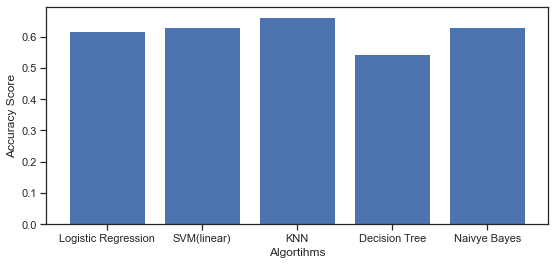

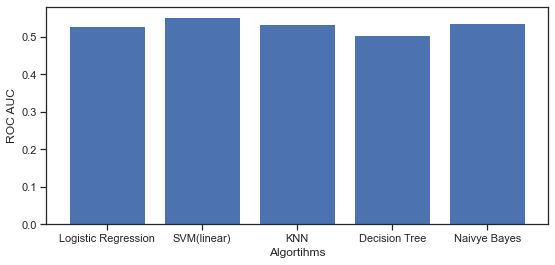

In [27]:
#lets plot the bar graph

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM(linear)','KNN','Decision Tree','Naivye Bayes'],accuracyArray,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM(linear)','KNN','Decision Tree','Naivye Bayes'],rocArray,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()